In [3]:
# """7 Investigate the impact of feature scaling and normalization on perception training use a dataset with varying scales and demonstrate how normalization affects the convergence of the perceptron"""

'7 Investigate the impact of feature scaling and normalization on perception training use a dataset with varying scales and demonstrate how normalization affects the convergence of the perceptron'

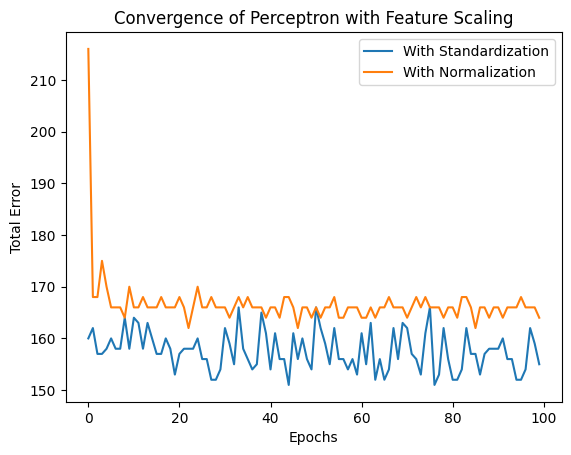

In [9]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_dim):
        self.weights = np.random.rand(input_dim)
        self.bias = np.random.rand(1)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

    def train(self, X, y, learning_rate=0.1, epochs=100):
        errors = []
        for _ in range(epochs):
            total_error = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                error = target - prediction
                total_error += np.abs(error)
                self.weights += learning_rate * error * xi
                self.bias += learning_rate * error
            errors.append(total_error)
        return errors

# Generate a toy dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling - Standardization
scaler_standard = StandardScaler()
X_train_standardized = scaler_standard.fit_transform(X_train)
X_test_standardized = scaler_standard.transform(X_test)

# Feature scaling - Normalization
scaler_minmax = MinMaxScaler()
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_test_normalized = scaler_minmax.transform(X_test)

# Initialize perceptrons
perceptron_standard = Perceptron(input_dim=X_train_standardized.shape[1])
perceptron_normalized = Perceptron(input_dim=X_train_normalized.shape[1])

# Train the perceptrons
errors_standardized = perceptron_standard.train(X_train_standardized, y_train)
errors_normalized = perceptron_normalized.train(X_train_normalized, y_train)

# Plot the errors during training
plt.plot(range(len(errors_standardized)), errors_standardized, label='With Standardization')
plt.plot(range(len(errors_normalized)), errors_normalized, label='With Normalization')
plt.xlabel('Epochs')
plt.ylabel('Total Error')
plt.title('Convergence of Perceptron with Feature Scaling')
plt.legend()
plt.show()
